<p><font size = 5, color ="brown"><strong>NAME : Darshan Darekar</strong></font></p><br>
<p><font size = 5, color ="brown"><strong>DOMAIN : Data Science and Business Analytics</strong></font></p><br>
<p><font size = 5, color ="brown"><strong>TASK : Prediction Using Unsupervised Learning</strong></font></p><br>
<p><font size = 5, color ="brown"><strong>BATCH : GRIPSEP23</strong></font></p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

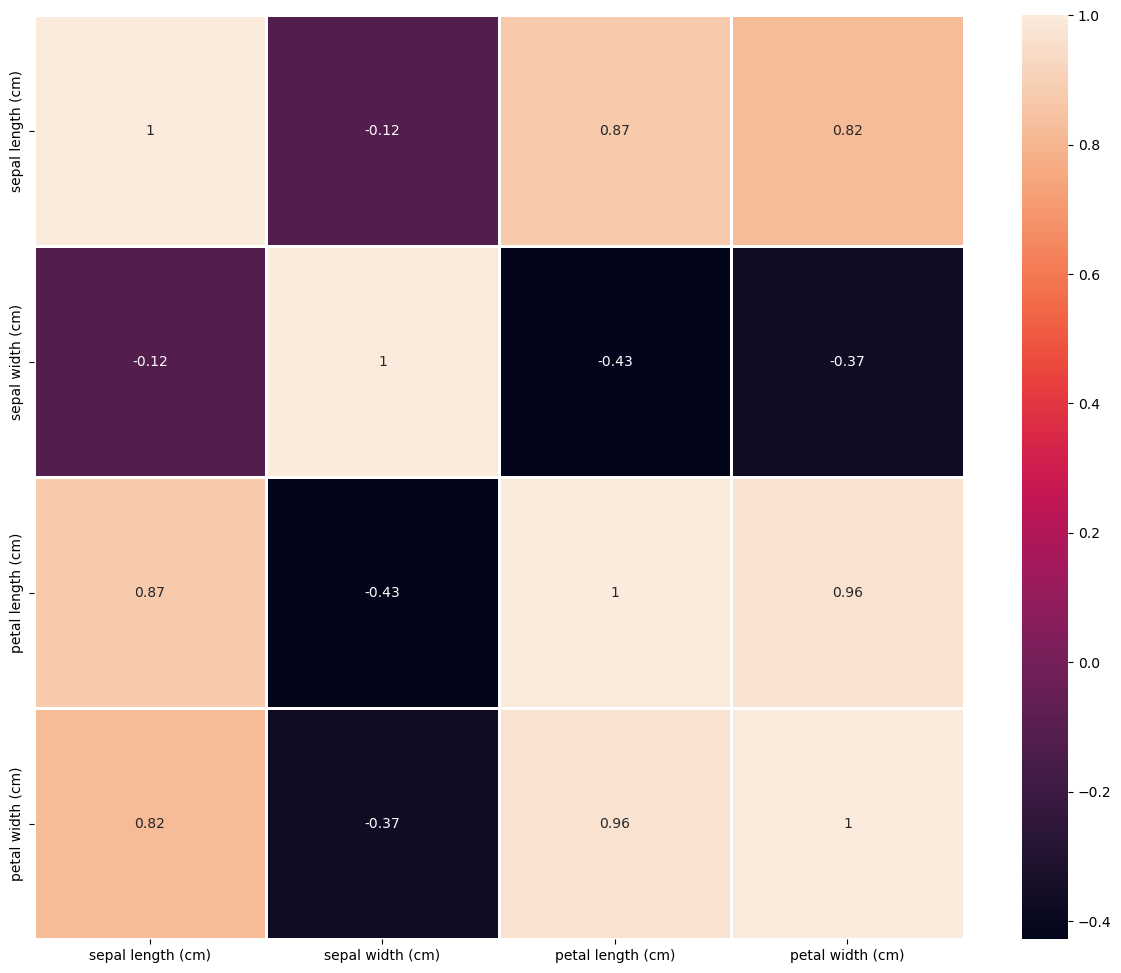

In [6]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

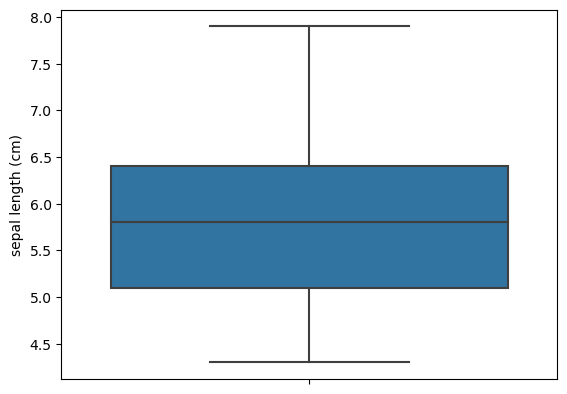

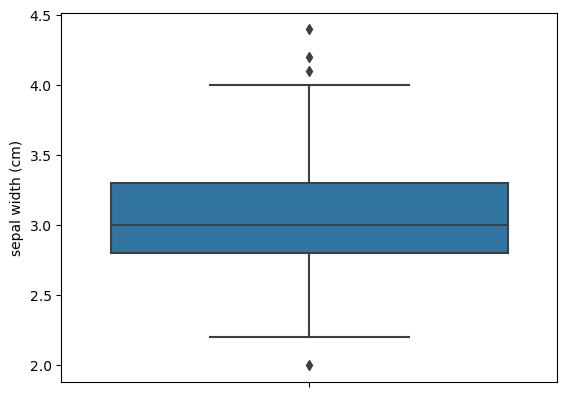

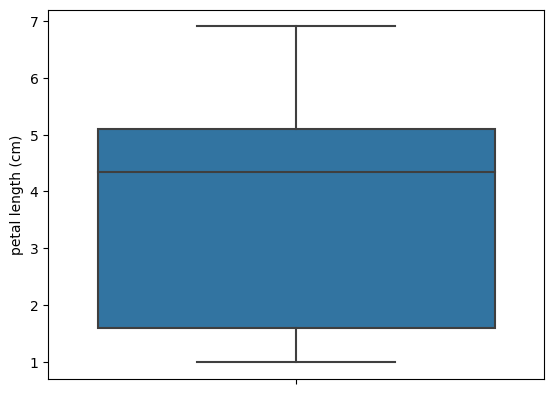

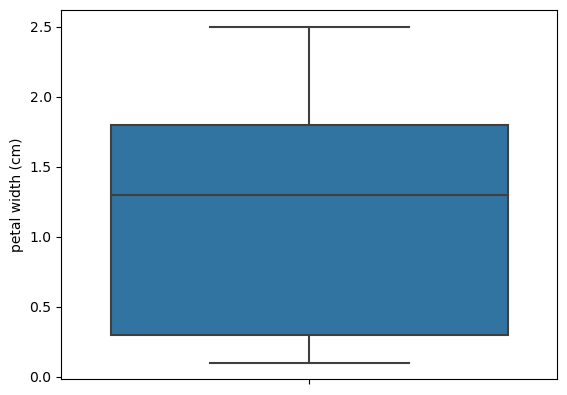

In [7]:
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

- From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

In [8]:
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape 

(146, 4)

- We can see that after outlier treatment the number of roes are reduced to 146 from 150

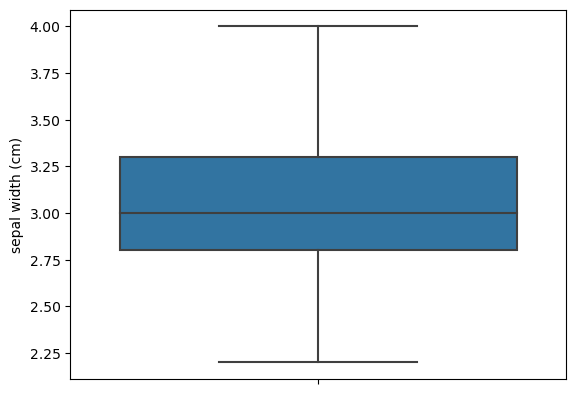

In [9]:
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [10]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

In [11]:
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.578228
4,5,88.927558
5,6,77.731235
6,7,67.976633
7,8,61.037356
8,9,52.706625
9,10,47.149275


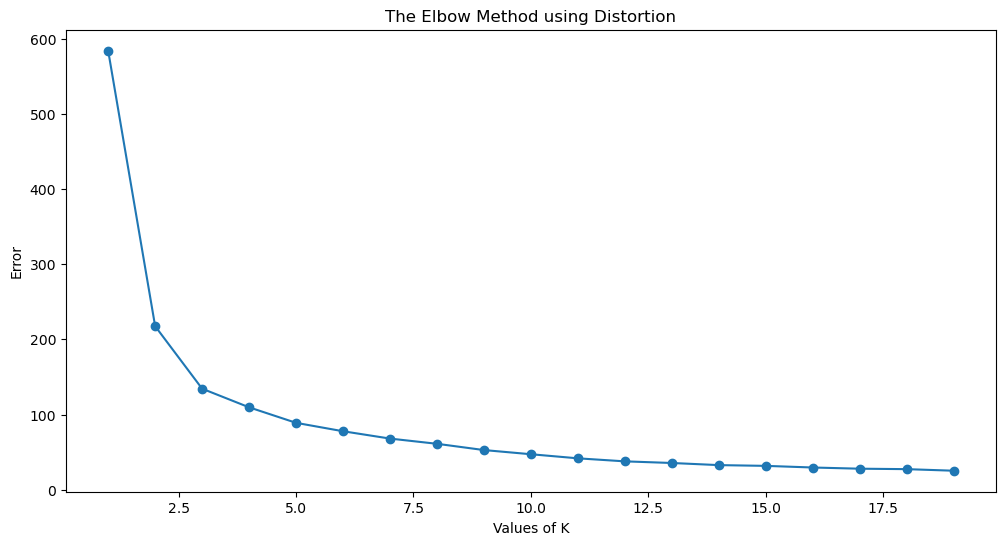

In [12]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

- From the above elbow curve we can say that '3' is the optimal number of cluster 

In [13]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [14]:
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [15]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean',
               'petal width (cm)_mean']
df2.head()

,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,0,4.976596,3.376596,1.461702,0.246809
1,1,5.916393,2.760656,4.408197,1.440984
2,2,6.850000,3.073684,5.742105,2.071053


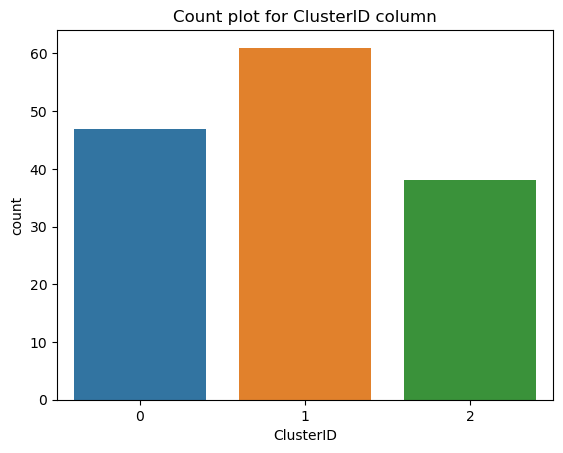

In [16]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

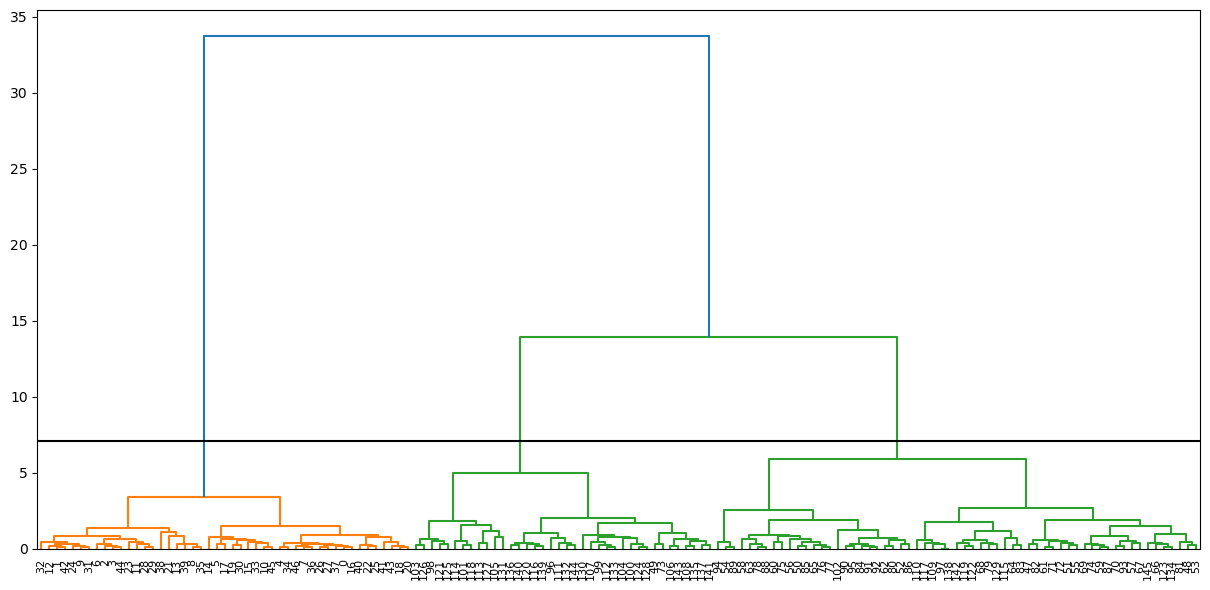

In [17]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=150,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()

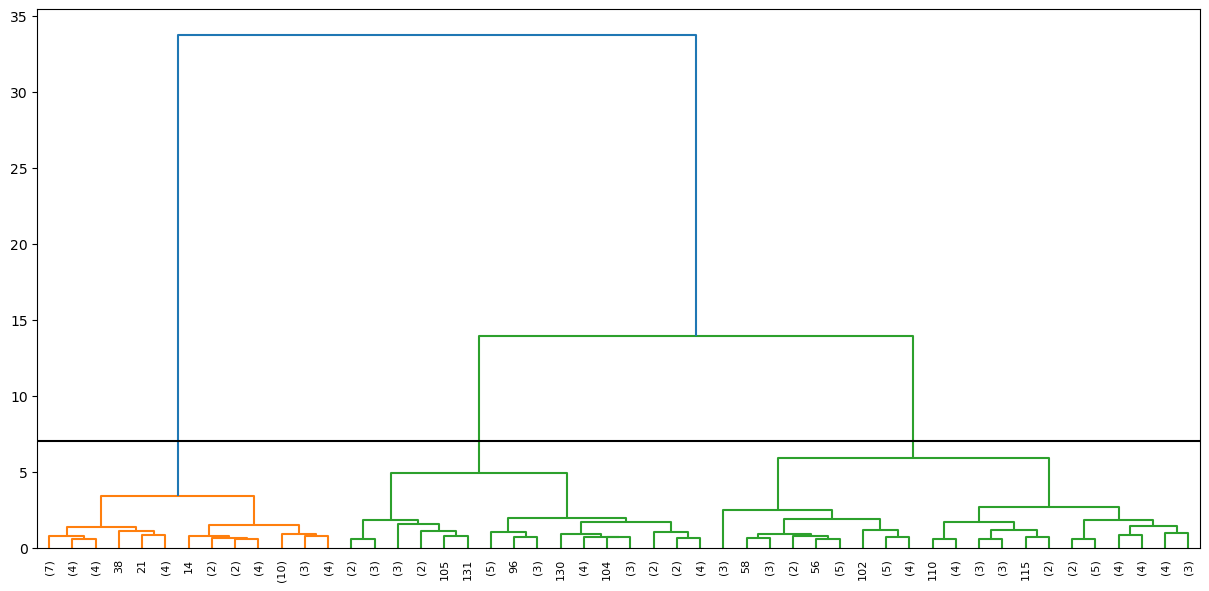

In [18]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')


max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=50,                  
           leaf_rotation=90.,      
           leaf_font_size=8., 
          )
plt.axhline(y=max_d, c='k')
plt.show()



- From the above two dendrogram we can say that there are three cluster

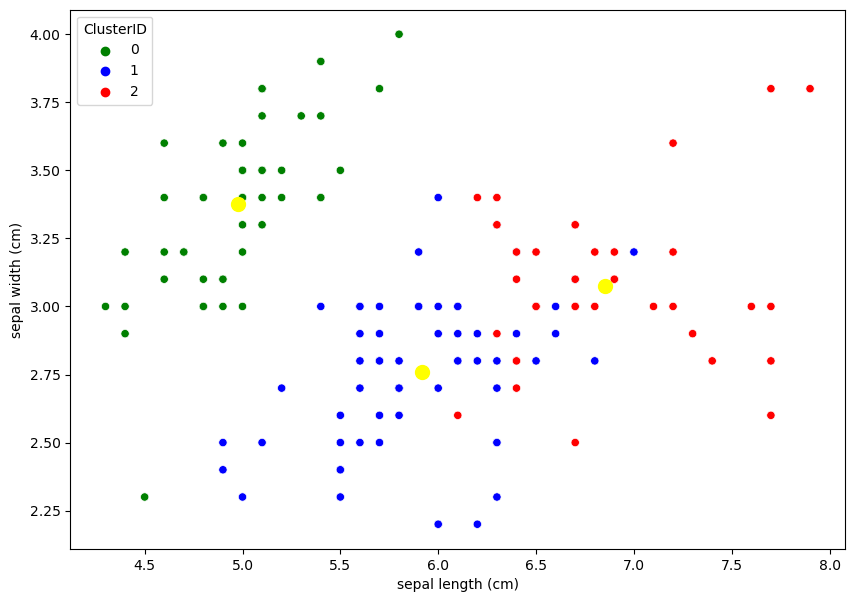

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()